In [74]:
# https://www.tensorflow.org/tutorials/quickstart/beginner?hl=pt-br
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.regularizers import l2

print(tf.__version__)


2.5.0


In [81]:
# http://yann.lecun.com/exdb/mnist/
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

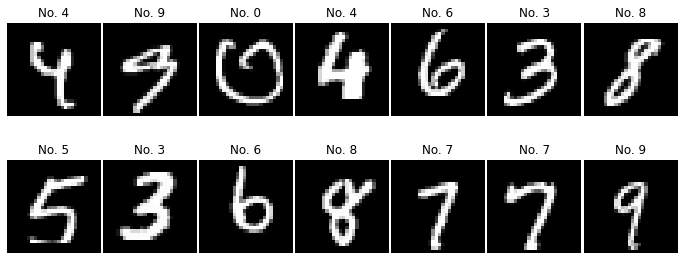

In [82]:
# display 14 random images from the training set
import numpy as np
np.random.seed(123)

rand_14 = np.random.randint(0, X_train.shape[0],14)
sample_digits = X_train[rand_14]
sample_labels = y_train[rand_14]
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()

In [83]:
# re-scale the image data to values between (0.0,1.0]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [84]:
# Add a channels dimension
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]
X_train.shape

(60000, 28, 28, 1)

In [85]:
# reshaping images to 60000x32x32x1 using pad
X_train = np.pad(X_train, ((0,0), (2,2), (2,2), (0,0)))
X_test = np.pad(X_test, ((0,0), (2,2), (2,2), (0,0)))
X_train.shape

(60000, 32, 32, 1)

In [87]:
y_train = y_train.reshape(-1,1)
y_train.shape

(60000, 1)

In [88]:
from sklearn.preprocessing import OneHotEncoder
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_train)
y.shape

(60000, 10)

In [65]:
def lenet_model(img_shape,n_classes,l2_reg=0.01):
    # Initialize model
    model = tf.keras.models.Sequential()
    # 1 layer
    model.add(tf.keras.layers.Conv2D(20, (5, 5), padding="same",input_shape=img_shape, kernel_regularizer=l2(l2_reg)))
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # 2 layer
    model.add(tf.keras.layers.Conv2D(50, (5, 5), padding="same",kernel_regularizer=l2(l2_reg)))
    model.add(tf.keras.layers.Activation("relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # Fully connected layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(500, kernel_regularizer=l2(l2_reg)))
    model.add(tf.keras.layers.Activation("relu"))
    # Softmax
    model.add(tf.keras.layers.Dense(n_classes, kernel_regularizer=l2(l2_reg)))
    model.add(tf.keras.layers.Activation("softmax"))
    model.summary()
    return model

In [89]:
def lenet_model(img_shape,n_classes):
    # Initialize model
    model = tf.keras.models.Sequential()

    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', kernel_regularizer='l2', input_shape=img_shape))
    model.add(layers.AveragePooling2D())

    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), kernel_regularizer='l2', activation='relu'))
    model.add(layers.AveragePooling2D())

    model.add(layers.Flatten())

    model.add(layers.Dense(units=120, activation='relu'))
    model.add(layers.Dense(units=84, activation='relu'))
    model.add(layers.Dense(units=n_classes, activation = 'softmax'))

    model.summary()      
        
    return model

In [91]:
input_shape = (32, 32, 1)
num_classes = 10

model = lenet_model(input_shape, num_classes)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_31 (Dense)             (None, 84)              

In [92]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [93]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8992 - accuracy: 0.7430 - val_loss: 0.3976 - val_accuracy: 0.9092
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3384 - accuracy: 0.9244 - val_loss: 0.2895 - val_accuracy: 0.9379
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2633 - accuracy: 0.9429 - val_loss: 0.2268 - val_accuracy: 0.9533


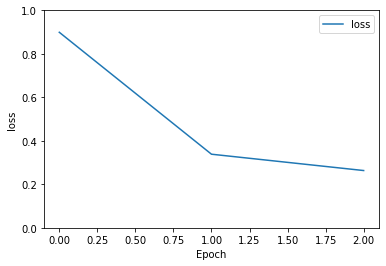

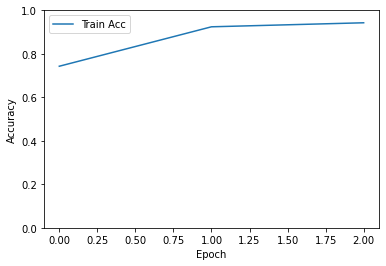

In [94]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='loss')
    #plt.plot(hist['epoch'], hist['val_loss'],
    #       label = 'Val loss')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Acc')
    #plt.plot(hist['epoch'], hist['val_accuracy'],
    #       label = 'Val Acc')
    plt.ylim([0,1])
    plt.legend()
    plt.show()


plot_history(history)


In [95]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: {}".format(scores[1]))


313/313 [==============================] - 1s 2ms/step - loss: 0.2268 - accuracy: 0.9533
Accuracy: 0.9532999992370605


In [96]:
predictions = model.predict(X_test)
print(predictions.shape)


(10000, 10)


In [97]:
pred = np.argmax(predictions, axis=1)
pred.shape

(10000,)

### Ground Truth Labels

In [ ]:
# display 14 random images from the training set
import numpy as np
np.random.seed(42)
X_test = X_test.reshape(-1, 32, 32)
rand_14 = np.random.randint(0, X_test.shape[0],14)
#rand_14 = range(14)
sample_digits = X_test[rand_14]
sample_labels = pred[rand_14]
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()

### Predicted Labels

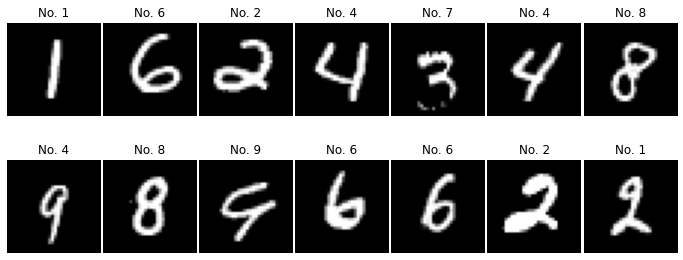

In [100]:
# display 14 random images from the training set
import numpy as np
np.random.seed(42)
X_test = X_test.reshape(-1, 32, 32)
rand_14 = np.random.randint(0, X_test.shape[0],14)
#rand_14 = range(14)
sample_digits = X_test[rand_14]
sample_labels = pred[rand_14]
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()